# Introduction to Deep Learning: Cours-2
_Adapted from [Dataflowr](https://dataflowr.github.io) by Marc Lelarge_

## System setup

Import the required packages, check the current version of PyTorch, and check that GPU is available (on Colab you may need to change the runtime first).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

print(f"{torch.__version__=}")

torch.__version__='2.9.1'


## Back to Basics: Tensors

Tensors are used to encode the signal to process, but also the internal states and parameters of models.

**Manipulating data through this constrained structure allows to use CPUs and GPUs at peak performance.**

In PyTorch, a Tensor is similar to numpy NDArray: a multidimensional array containing data **of the same type**.

### Tensor Construction Functions

PyTorch provides several functions to create tensors. Let's start with the most common ones for 1D arrays.

#### Creating tensors filled with constant values

The most basic constructors create tensors filled with zeros, ones, or uninitialized values.

In [2]:
# Reference tensor
print(torch.zeros(10))
print(torch.ones(12))
print(torch.empty(3))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0., 0., 0.])


#### Multidimensional tensors

All these functions work with higher dimensions too. Just pass a tuple of dimensions.

In [3]:
# 2D tensor (matrix)
matrix = torch.zeros(3, 4)
print(f"2D zeros:\n{matrix}")
print(f"shape: {matrix.shape}")

# 3D tensor
tensor_3d = torch.ones(2, 3, 4)
print(f"\n3D ones shape: {tensor_3d.shape}")

# 4D tensor (typical for batches of images: batch, channels, height, width)
batch_images = torch.randn(8, 3, 32, 32)
print(f"4D batch of images shape: {batch_images.shape}")

2D zeros:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
shape: torch.Size([3, 4])

3D ones shape: torch.Size([2, 3, 4])
4D batch of images shape: torch.Size([8, 3, 32, 32])


#### Creating random tensors

Random tensors are essential for initializing neural network weights.

In [4]:
# Random values from uniform distribution [0, 1)
rand_uniform = torch.rand(5)
print(f"rand (uniform [0,1)): {rand_uniform}")

# Random values from standard normal distribution (mean=0, std=1)
rand_normal = torch.randn(5)
print(f"randn (normal N(0,1)): {rand_normal}")

# Random integers
rand_int = torch.randint(0, 10, (5,))  # integers in [0, 10)
print(f"randint(0, 10): {rand_int}")

rand (uniform [0,1)): tensor([0.4909, 0.1555, 0.3372, 0.1303, 0.0763])
randn (normal N(0,1)): tensor([ 1.0824, -1.0363, -1.2346,  0.4886,  1.0312])
randint(0, 10): tensor([3, 5, 9, 6, 1])


#### Creating tensors from data

You can also create tensors directly from Python lists or NumPy arrays.

In [5]:
# From a Python list
from_list = torch.tensor([1, 2, 3, 4, 5])
print(f"from list: {from_list}")

# From a NumPy array
import numpy as np
np_array = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
from_numpy = torch.from_numpy(np_array)
print(f"from numpy: {from_numpy}, dtype: {from_numpy.dtype}")

from list: tensor([1, 2, 3, 4, 5])
from numpy: tensor([1., 2., 3., 4., 5.], dtype=torch.float64), dtype: torch.float64


#### Creating tensors with ranges

Similar to `numpy.arange()` and `numpy.linspace()`, PyTorch provides `torch.arange()` and `torch.linspace()`.

In [6]:
# Create a range of values
range_tensor = torch.arange(0, 10)
print(f"arange(0, 10): {range_tensor}")

# With a step
range_step = torch.arange(0, 10, 2)
print(f"arange(0, 10, 2): {range_step}")

# Linearly spaced values
linspace_tensor = torch.linspace(0, 1, 5)
print(f"linspace(0, 1, 5): {linspace_tensor}")

arange(0, 10): tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
arange(0, 10, 2): tensor([0, 2, 4, 6, 8])
linspace(0, 1, 5): tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


#### Specifying data type

You can specify the data type (dtype) when creating tensors.

In [7]:
# Integer tensor
int_tensor = torch.zeros(5, dtype=torch.int32)
print(f"int32 tensor: {int_tensor}, dtype: {int_tensor.dtype}")

# Long (64-bit integer) tensor
long_tensor = torch.ones(5, dtype=torch.long)
print(f"long tensor: {long_tensor}, dtype: {long_tensor.dtype}")

# Float32 (default for float operations)
float_tensor = torch.ones(5, dtype=torch.float32)
print(f"float32 tensor: {float_tensor}, dtype: {float_tensor.dtype}")

# Float64 (double precision)
double_tensor = torch.zeros(5, dtype=torch.float64)
print(f"float64 tensor: {double_tensor}, dtype: {double_tensor.dtype}")

int32 tensor: tensor([0, 0, 0, 0, 0], dtype=torch.int32), dtype: torch.int32
long tensor: tensor([1, 1, 1, 1, 1]), dtype: torch.int64
float32 tensor: tensor([1., 1., 1., 1., 1.]), dtype: torch.float32
float64 tensor: tensor([0., 0., 0., 0., 0.], dtype=torch.float64), dtype: torch.float64


**Important:** `torch.empty()` doesn't initialize the values - it's faster but contains arbitrary data. Use it only when you're going to fill all values immediately.

In [8]:
# Create a 1D tensor of zeros
zeros = torch.zeros(5)
print(f"zeros: {zeros}")
print(f"dtype: {zeros.dtype}, shape: {zeros.shape}")

# Create a 1D tensor of ones
ones = torch.ones(5)
print(f"\nones: {ones}")
print(f"dtype: {ones.dtype}, shape: {ones.shape}")

# Create an uninitialized tensor (contains whatever was in memory)
empty = torch.empty(5)
print(f"\nempty: {empty}")
print(f"dtype: {empty.dtype}, shape: {empty.shape}")

zeros: tensor([0., 0., 0., 0., 0.])
dtype: torch.float32, shape: torch.Size([5])

ones: tensor([1., 1., 1., 1., 1.])
dtype: torch.float32, shape: torch.Size([5])

empty: tensor([0., 0., 0., 0., 0.])
dtype: torch.float32, shape: torch.Size([5])


### Indexing and Slicing

PyTorch tensors support NumPy-style indexing and slicing. You can extract elements, rows, columns, or multi-dimensional slices from tensors.

#### Basic indexing for 1D tensors

In [9]:
# Create a 1D tensor
x = torch.arange(10)
print(f"Original tensor: {x}")
 
# Access single element
print(f"x[0]: {x[0]}")
print(f"x[5]: {x[5]}")
print(f"x[-1] (last element): {x[-1]}")

# Extract scalar value with .item()
print(f"{x[5].item()=} ({type(x[5].item())})")
print(f"{x[5].item()=} ({type(x[5])})")

Original tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[0]: 0
x[5]: 5
x[-1] (last element): 9
x[5].item()=5 (<class 'int'>)
x[5].item()=5 (<class 'torch.Tensor'>)


#### Slicing 1D tensors

Slicing uses the syntax `[start:stop:step]`. Like Python lists, the stop index is exclusive.

In [10]:
x = torch.arange(10)
print(f"Original: {x}")

# Basic slicing
print(f"x[2:5]: {x[2:5]}")        # Elements from index 2 to 4
print(f"x[:5]: {x[:5]}")          # First 5 elements
print(f"x[5:]: {x[5:]}")          # From index 5 to end
print(f"x[:]: {x[:]}")            # All elements (creates a view)

# Slicing with step
print(f"x[::2]: {x[::2]}")        # Every other element
print(f"x[1::2]: {x[1::2]}")      # Every other element, starting at 1

Original: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[2:5]: tensor([2, 3, 4])
x[:5]: tensor([0, 1, 2, 3, 4])
x[5:]: tensor([5, 6, 7, 8, 9])
x[:]: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[::2]: tensor([0, 2, 4, 6, 8])
x[1::2]: tensor([1, 3, 5, 7, 9])


#### Indexing 2D tensors (matrices)

For multi-dimensional tensors, use comma-separated indices for each dimension.

In [11]:
# Create a 2D tensor
matrix = torch.arange(12).reshape(3, 4)
print(f"Original matrix:\n{matrix}")

# Access single element
print(f"\nmatrix[0, 0]: {matrix[0, 0]}")  # First row, first column
print(f"matrix[1, 2]: {matrix[1, 2]}")    # Second row, third column
print(f"matrix[-1, -1]: {matrix[-1, -1]}")  # Last row, last column

# Access entire row
print(f"\nmatrix[0]: {matrix[0]}")        # First row (equivalent to matrix[0, :])
print(f"matrix[1, :]: {matrix[1, :]}")    # Second row (explicit)

# Access entire column
print(f"\nmatrix[:, 0]: {matrix[:, 0]}")  # First column
print(f"matrix[:, 2]: {matrix[:, 2]}")    # Third column

Original matrix:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

matrix[0, 0]: 0
matrix[1, 2]: 6
matrix[-1, -1]: 11

matrix[0]: tensor([0, 1, 2, 3])
matrix[1, :]: tensor([4, 5, 6, 7])

matrix[:, 0]: tensor([0, 4, 8])
matrix[:, 2]: tensor([ 2,  6, 10])


#### Slicing 2D tensors

You can slice along multiple dimensions simultaneously.

In [12]:
matrix = torch.arange(12).reshape(3, 4)
print(f"Original matrix:\n{matrix}")

# Slice rows and columns
print(f"\nmatrix[0:2, :]: First 2 rows\n{matrix[0:2, :]}")
print(f"\nmatrix[:, 1:3]: Columns 1 and 2\n{matrix[:, 1:3]}")
print(f"\nmatrix[1:, 2:]: Submatrix from row 1, col 2\n{matrix[1:, 2:]}")

# Combining slicing with steps
print(f"\nmatrix[::2, ::2]: Every other row and column\n{matrix[::2, ::2]}")

Original matrix:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

matrix[0:2, :]: First 2 rows
tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

matrix[:, 1:3]: Columns 1 and 2
tensor([[ 1,  2],
        [ 5,  6],
        [ 9, 10]])

matrix[1:, 2:]: Submatrix from row 1, col 2
tensor([[ 6,  7],
        [10, 11]])

matrix[::2, ::2]: Every other row and column
tensor([[ 0,  2],
        [ 8, 10]])


#### Advanced indexing with lists and tensors

You can use lists or tensors to select specific indices.

In [13]:
x = torch.arange(10)
print(f"Original: {x}")

# Index with a list
indices = [0, 2, 4, 6]
print(f"x[indices]: {x[indices]}")

# Index with a tensor
indices_tensor = torch.tensor([1, 3, 5, 7])
print(f"x[indices_tensor]: {x[indices_tensor]}")

# Boolean indexing (masking)
mask = x > 5
print(f"\nBoolean mask (x > 5): {mask}")
print(f"x[mask]: {x[mask]}")

Original: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[indices]: tensor([0, 2, 4, 6])
x[indices_tensor]: tensor([1, 3, 5, 7])

Boolean mask (x > 5): tensor([False, False, False, False, False, False,  True,  True,  True,  True])
x[mask]: tensor([6, 7, 8, 9])


#### Modifying values through slicing

Slicing creates a **view** of the original tensor. Modifying the slice modifies the original tensor.

In [14]:
x = torch.arange(10)
print(f"Original: {x}")

# Modify a single element
x[5] = 100
print(f"After x[5] = 100: {x}")

# Modify a slice
x[2:5] = torch.tensor([20, 30, 40])
print(f"After x[2:5] = [20, 30, 40]: {x}")

# Set all elements in a slice to the same value
x[7:] = 0
print(f"After x[7:] = 0: {x}")

Original: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
After x[5] = 100: tensor([  0,   1,   2,   3,   4, 100,   6,   7,   8,   9])
After x[2:5] = [20, 30, 40]: tensor([  0,   1,  20,  30,  40, 100,   6,   7,   8,   9])
After x[7:] = 0: tensor([  0,   1,  20,  30,  40, 100,   6,   0,   0,   0])


#### Using `...` (ellipsis) for flexible slicing

The ellipsis `...` represents "all remaining dimensions".

In [15]:
x = torch.randn(4, 3, 32, 32)  # (batch, channels, height, width)

# These are equivalent:
print(f"x[0, :, :, :].shape: {x[0, :, :, :].shape}")
print(f"x[0, ...].shape: {x[0, ...].shape}")
print(f"x[0].shape: {x[0].shape}")

# Extract last column from all dimensions
print(f"\nx[..., -1].shape: {x[..., -1].shape}")  # Last width dimension
print(f"x[:, :, :, -1].shape: {x[:, :, :, -1].shape}")  # Equivalent

x[0, :, :, :].shape: torch.Size([3, 32, 32])
x[0, ...].shape: torch.Size([3, 32, 32])
x[0].shape: torch.Size([3, 32, 32])

x[..., -1].shape: torch.Size([4, 3, 32])
x[:, :, :, -1].shape: torch.Size([4, 3, 32])


### Bridge to numpy

Let's start with a random 3x5 matrix.

In [16]:
x = torch.randn(3,5)
print(x)
print(f"{x.shape=}, {x.size()=}")

tensor([[-0.8257, -0.0550, -0.6440, -0.7286,  0.7837],
        [ 0.4404,  2.5442,  1.4665, -1.0076,  0.6534],
        [ 0.2989,  1.5638, -1.7952,  1.5919, -0.2438]])
x.shape=torch.Size([3, 5]), x.size()=torch.Size([3, 5])


You can also convert a Torch tensor to numpy that can be used with other libraries.

In [17]:
y = x.numpy()
print(y)

[[-0.8257223  -0.05502216 -0.6440406  -0.72859675  0.7836796 ]
 [ 0.44040415  2.5442047   1.4664524  -1.0075908   0.65340555]
 [ 0.29892558  1.563755   -1.7951679   1.5918652  -0.24379326]]


#### Careful with types!

It is also possible to cast an existing tensor to a different type.

In [18]:
a = np.ones(5)
b = torch.from_numpy(a)
print(a.dtype)
print(b.dtype)

c = b.long()
print(c.dtype, c)
print(b.dtype, b)

float64
torch.float64
torch.int64 tensor([1, 1, 1, 1, 1])
torch.float64 tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Sometimes, the cast is automatic...

In [19]:
xr = torch.randn(3, 5)
print(xr.dtype, xr)

resb = xr + b
print(resb)

torch.float32 tensor([[ 0.3850, -0.6052, -0.2987, -0.0993, -1.1574],
        [-0.7862, -0.5288, -0.4873,  1.7603, -1.4851],
        [ 0.7508, -0.8196, -1.8897, -1.4311, -0.8497]])
tensor([[ 1.3850,  0.3948,  0.7013,  0.9007, -0.1574],
        [ 0.2138,  0.4712,  0.5127,  2.7603, -0.4851],
        [ 1.7508,  0.1804, -0.8897, -0.4311,  0.1503]], dtype=torch.float64)


In [20]:
resc = xr + c
resc
print(resc)

tensor([[ 1.3850,  0.3948,  0.7013,  0.9007, -0.1574],
        [ 0.2138,  0.4712,  0.5127,  2.7603, -0.4851],
        [ 1.7508,  0.1804, -0.8897, -0.4311,  0.1503]])


But be careful, with types and what you see in the output...

In [21]:
resb == resc

tensor([[False,  True,  True, False,  True],
        [ True,  True, False, False,  True],
        [False,  True,  True,  True,  True]])

In [22]:
torch.set_printoptions(precision=10)

print(resb[0,-1])
print(resc[0,-1])

tensor(-0.1573822498, dtype=torch.float64)
tensor(-0.1573822498)


In [23]:
resc[0,-1].dtype

torch.float32

In [24]:
xr[0,-1]

tensor(-1.1573822498)

In [25]:
torch.set_printoptions(precision=4)

### Broadcasting

(from https://numpy.org/doc/stable/user/basics.broadcasting.html)

Broadcasting automagically expands dimensions by replicating coefficients, when it is necessary to perform operations.


**Broadcasting Rule:**

1. If one of the tensors has fewer dimensions than the other, it is reshaped by adding as many dimensions of size 1 as necessary in the front; then
2. for every mismatch, if one of the two tensor is of size one, it is expanded along this axis by replicating coefficients.

If there is a tensor size mismatch for one of the dimension and neither of them is one, the operation fails.

**Examples:**

When one tensor has a dimension of size 0 (empty tensor):

![broadcast_1x0](imgs/broadcast_1x0.png)



In [26]:
print(torch.Tensor([1, 2, 3]) * 2)
print(torch.Tensor([1, 2, 3]) * torch.Tensor([2]))

tensor([2., 4., 6.])
tensor([2., 4., 6.])


A 2D tensor broadcasted with a 1D tensor:

![broadcast_2x1](imgs/broadcast_2x1.png)


In [27]:
a = torch.arange(0, 40, 10).unsqueeze(1).repeat(1, 3)
b = torch.arange(1, 4, 1)

a + b

tensor([[ 1,  2,  3],
        [11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])

When broadcasting fails due to incompatible shapes:

![broadcast_mismatch](imgs/broadcast_mismatch.png)

In [28]:
b = torch.arange(1, 5, 1)

a + b

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 1

When both tensors have at least one dimension of size 1, both are reshaped:

![broadcast_1x1](imgs/broadcast_1x1.png)

In [29]:
a = torch.arange(0, 40, 10).unsqueeze(1)
b = torch.arange(0, 4, 1)

print(f"{a=}, {a.shape}")
print(f"{b=}, {b.shape}")
a + b

a=tensor([[ 0],
        [10],
        [20],
        [30]]), torch.Size([4, 1])
b=tensor([0, 1, 2, 3]), torch.Size([4])


tensor([[ 0,  1,  2,  3],
        [10, 11, 12, 13],
        [20, 21, 22, 23],
        [30, 31, 32, 33]])

### In-place modification

If you care a lot about memory consumption, you can also use in-place mutation of your tensors.

In [30]:
print(f"{x=}")
print(f"{xr=}")

print(f"{x+xr=}")

x=tensor([[-0.8257, -0.0550, -0.6440, -0.7286,  0.7837],
        [ 0.4404,  2.5442,  1.4665, -1.0076,  0.6534],
        [ 0.2989,  1.5638, -1.7952,  1.5919, -0.2438]])
xr=tensor([[ 0.3850, -0.6052, -0.2987, -0.0993, -1.1574],
        [-0.7862, -0.5288, -0.4873,  1.7603, -1.4851],
        [ 0.7508, -0.8196, -1.8897, -1.4311, -0.8497]])
x+xr=tensor([[-0.4407, -0.6603, -0.9427, -0.8279, -0.3737],
        [-0.3458,  2.0154,  0.9792,  0.7527, -0.8317],
        [ 1.0497,  0.7442, -3.6848,  0.1608, -1.0935]])


In [31]:
x.add_(xr)
print(f"{x=}")

x=tensor([[-0.4407, -0.6603, -0.9427, -0.8279, -0.3737],
        [-0.3458,  2.0154,  0.9792,  0.7527, -0.8317],
        [ 1.0497,  0.7442, -3.6848,  0.1608, -1.0935]])


Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: `x.fill_(y)` (fill with value y), `x.t_()` (transpose), will change ```x```.

In [32]:
print(f"{x.t()=}")

x.t()=tensor([[-0.4407, -0.3458,  1.0497],
        [-0.6603,  2.0154,  0.7442],
        [-0.9427,  0.9792, -3.6848],
        [-0.8279,  0.7527,  0.1608],
        [-0.3737, -0.8317, -1.0935]])


In [33]:
x.t_()
print(f"{x=}")

x=tensor([[-0.4407, -0.3458,  1.0497],
        [-0.6603,  2.0154,  0.7442],
        [-0.9427,  0.9792, -3.6848],
        [-0.8279,  0.7527,  0.1608],
        [-0.3737, -0.8317, -1.0935]])


### Shared memory

Careful (again) changing the torch tensor modify the numpy array and vice-versa (see the PyTorch documentation [here](https://pytorch.org/docs/stable/torch.html#torch.from_numpy)):
The returned tensor by `torch.from_numpy` and ndarray share the same memory. Modifications to the tensor will be reflected in the ndarray and vice versa. 

In [34]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [35]:
a[2] = 0
print(b)

tensor([1., 1., 0., 1., 1.], dtype=torch.float64)


In [36]:
b[3] = 5
print(a)

[1. 1. 0. 5. 1.]


### Cuda

Now, compared to numpy, one key advantage of PyTorch, is that we can use them on GPU.

In [37]:
torch.cuda.is_available() or torch.mps.is_available()

True

In [38]:
device = "cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(device)

mps


By default, tensors live on CPU.

In [39]:
x.device

device(type='cpu')

We need to explicitely transfer them to GPU using the `.to(device)` method.

In [40]:
# Only run with a GPU runtime
y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
x = x.to(device)                       # or just use strings `.to("cuda")` or `.to("mps")`
z = x + y
print(z,z.type())
print(z.to("cpu"))

tensor([[ 0.5593,  0.6542,  2.0497],
        [ 0.3397,  3.0154,  1.7442],
        [ 0.0573,  1.9792, -2.6848],
        [ 0.1721,  1.7527,  1.1608],
        [ 0.6263,  0.1683, -0.0935]], device='mps:0') torch.mps.FloatTensor
tensor([[ 0.5593,  0.6542,  2.0497],
        [ 0.3397,  3.0154,  1.7442],
        [ 0.0573,  1.9792, -2.6848],
        [ 0.1721,  1.7527,  1.1608],
        [ 0.6263,  0.1683, -0.0935]])


Tensor with only one value (scalar) can be converted to regular Python values.

In [41]:
x = torch.randn(1)
x = x.to(device)

print(f"{x.device=}")
print(x.cpu().numpy())
print(x.item())


x.device=device(type='mps', index=0)
[0.21842754]
0.21842753887176514


# Simple interfaces to standard image data-bases


PyTorch already offers interfaces to the most popular datasets.
Let's check the [CIFAR10](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.CIFAR10) dataset.

In [42]:
import torchvision

data_dir = 'data'

cifar = torchvision.datasets.CIFAR10(data_dir, train = True, download = True)
cifar.data.shape

/Users/gbaudart/Cours/m2-idl/2025-m2-idl/.venv/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


(50000, 32, 32, 3)

Unfortunately, sometimes the data is not packaged in the expected format.
Here we need (batchs, channels, imgs).

In [43]:
torch.from_numpy(cifar.data).shape

torch.Size([50000, 32, 32, 3])

We need to permute the dimensions.

Doc: [`permute`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.permute)

In [44]:
x = torch.from_numpy(cifar.data).permute(0,3,1,2).float()
x = x / 255
print(x.type(), x.size(), x.min().item(), x.max().item())

torch.FloatTensor torch.Size([50000, 3, 32, 32]) 0.0 1.0


Now let's check the first 48 images. 

Doc: [`narrow(input, dim, start, length)`](https://pytorch.org/docs/stable/torch.html#torch.narrow)

In [45]:
# Narrows to the first images, converts to float
x = torch.narrow(x, 0, 0, 48)
print(x.shape)

torch.Size([48, 3, 32, 32])


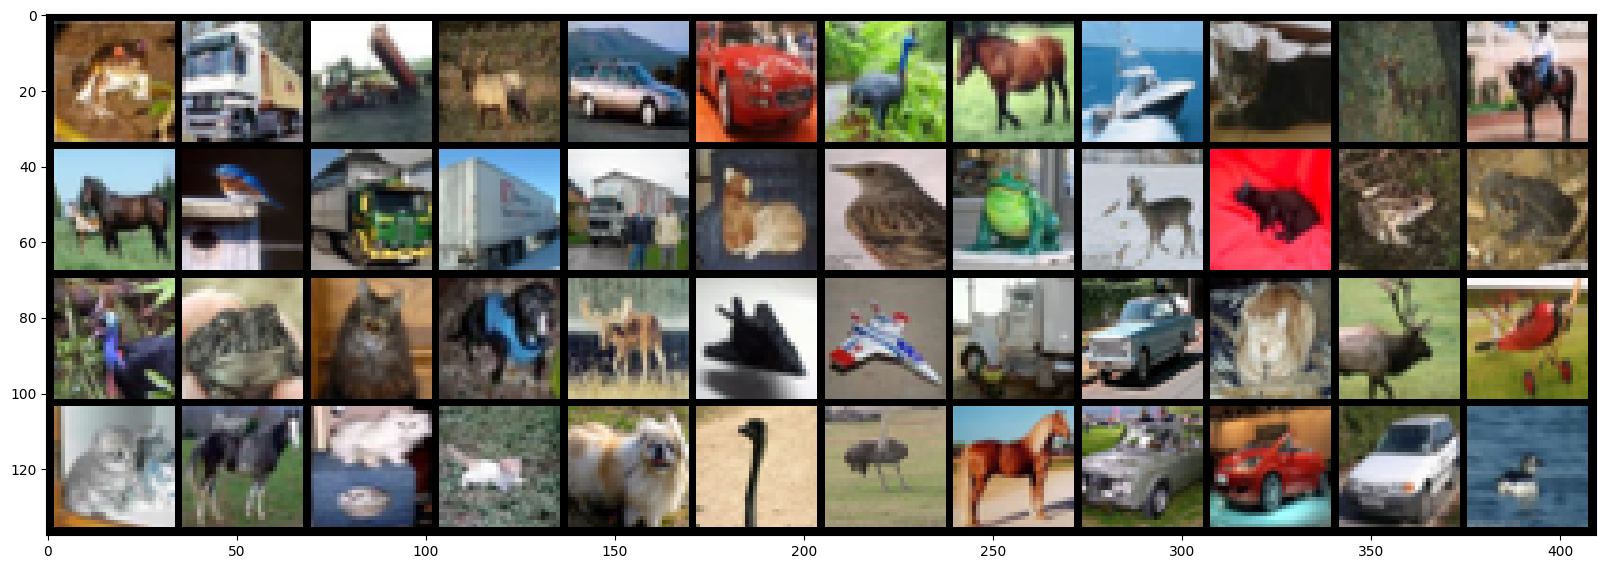

In [46]:
# Showing images
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
show(torchvision.utils.make_grid(x, nrow = 12))

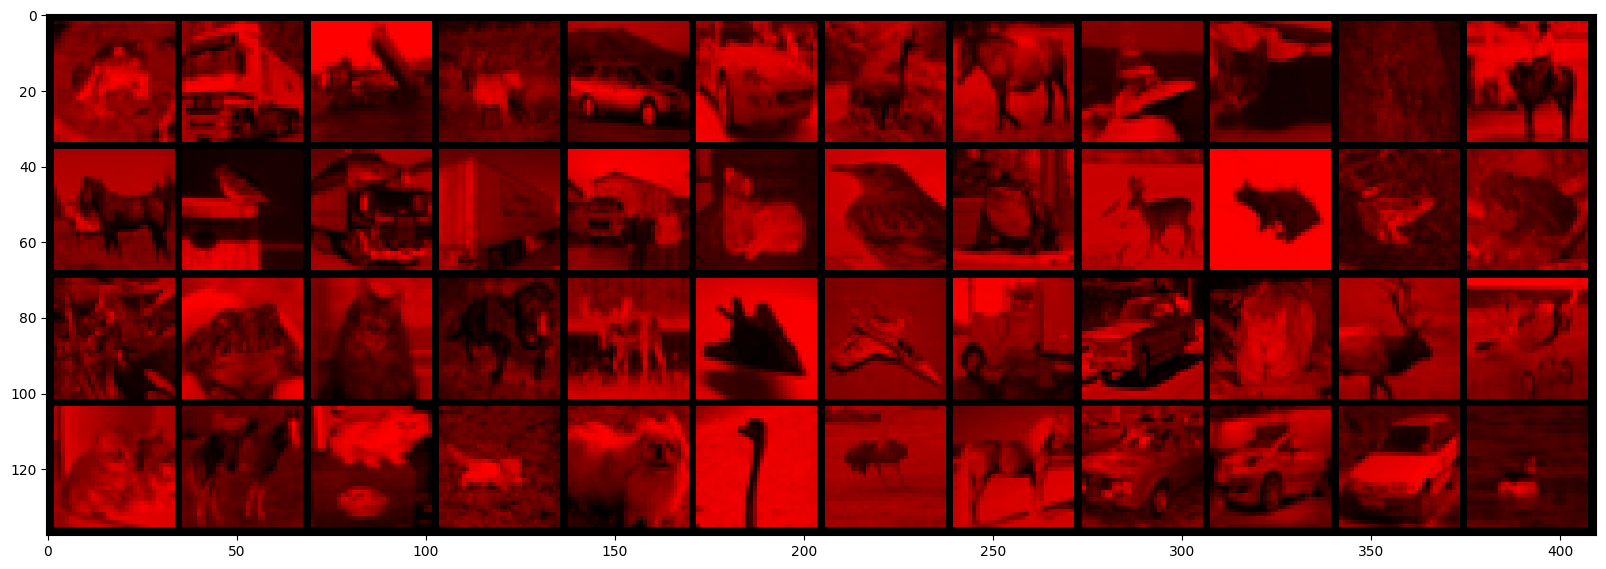

In [47]:
x[:, 1, ...] = 0 # kill green channel
x[:, 2, ...] = 0 # kill blue channel
show(torchvision.utils.make_grid(x, nrow = 12))